Algoritmo de Grover usando pulsos: Variando Sigma    

Procederemos a utilizar los recursos de Qiskit Pulse para calibrar el circuito y sus compuertas
con el fin de obtener resultados más precisos a la hora de simular los algoritmos
en los qiskit.providers dados y así obtener resultados fieles que nos permitan comparar
con los que obtuvimos anteriormente sin usar pulsos.

La estructura a la hora de aplicar los pulsos será la siguiente:
    Considerando que tendremos tres variaciones (variaciones de Sigma), estructuradas (Tiempo, amplitud, Sigma) tal que
    1) 100ns amp=0.1 Sigma=100/3 (33.33)
    2) 100ns amp=0.1 Sigma=10
    3) 100ns amp=0.1 Sigma=5
    
   Cada una de las variaciones serán aplicadas al circuito y se calibra según tal pulso y luego de ello
    se procederá a simular cada una en los simuladores:
        -FakeManila
        -FakeOpenPulse3Q
        
   Dicho esto podemos proceder

Importamos las librerías necesarias para el desarrollo, entre ellos los qiskit.providers
así como los recursos "pulse" y "transpile", también para la visualización del pulso 
se importa "Gaussian"

In [3]:
import numpy as np
import math
import qiskit as qiskit
from numpy import sqrt
from random import randint
from qiskit import *
from qiskit import Aer, QuantumCircuit, IBMQ, execute, quantum_info, transpile
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_histogram
from qiskit.tools import job_monitor
from qiskit.providers.fake_provider import FakeOpenPulse2Q, FakeOpenPulse3Q, FakeManila, FakeValencia, FakeHanoi
from qiskit import pulse, transpile
from qiskit.pulse.library import Gaussian

#Compuertas personalizadas
from qiskit.circuit import Gate
from qiskit import QiskitError

#informacion
import qiskit.tools.jupyter

provider = IBMQ.load_account()
belem = provider.get_backend('ibmq_belem') 
print('se ha ejecutado correctamente')


se ha ejecutado correctamente


Siguiendo lo expresado a los notebooks anteriores, aquí se expresa que:
"A continuación, se procede a armar el circuito cuántico 
definiendo el comportamiento del qubit. Así como las declaraciones (if, elif, else) 
establecidas al final que básicamente dependiendo el escenario
sucede una forma u otra en el circuito.
Podemos ver que en esta estructura a probar en los simuladores ya mencionados
denotamos que ya está incluido la definición final de la descripción del circuito
ya que agregamos el Glover_Iteration con sus determinadas compuertas y respectivos rangos".

In [4]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 


def Grover_Iteration(qc, x_qubit_0,x_qubit_1):
    qc.h(range(2))
    qc.x(range(2))
    qc.h(x_qubit_1)
    qc.cx(x_qubit_0,x_qubit_1)
    qc.h(x_qubit_1)
    qc.x(range(2))
    qc.h(range(2))
    
    return qc

print('se ha ejecutado correctamente')

se ha ejecutado correctamente


1) Características del pulso: 100ns amp=0.1 Sigma=100/3
(Recordemos que este puslo se ejecutará en los servidores ya establecidos arriba)

Considerando las definiciones ya establecidas, podemos entonces establecer el circuito
que hemos diseñado. Éste tendrá el backend=FakeManila.

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


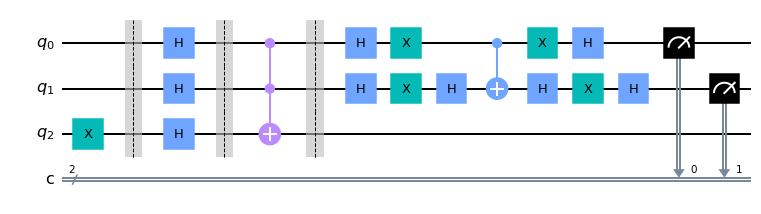

In [5]:
#Simulador de prueba FakeManila
backend = FakeManila() 
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


Procedemos a obtener inmediatamente las estadísticas de los estados del circuito con
el backend=FakeManila.

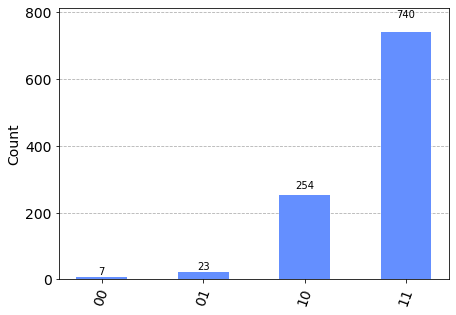

In [6]:
result = execute(circ, backend=FakeManila()).result();
job = backend.run(circ)
counts = job.result().get_counts()
plot_histogram(counts)

Construimos las calibraciones (el pulso), con los valores que establecimos al principio y luego lo dibujamos:

In [7]:
backend = FakeManila();

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=3), pulse.drive_channel(0))

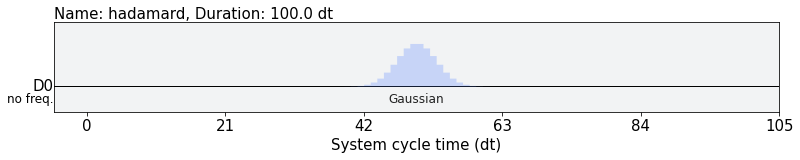

In [8]:
h_q0.draw()

In [9]:
backend = FakeManila();

with pulse.build(backend, name='hadamard') as h_q0: #el 'h_q0 es invariable y puede ser nombrado de cualquier forma solo identifica'
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=33.33), pulse.drive_channel(0))

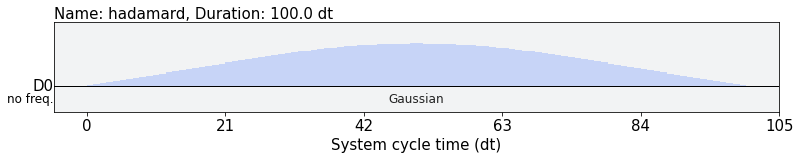

In [10]:
h_q0.draw()

Añadimos la calibración transpilando nuestro circuito:

In [11]:
circ.add_calibration( 'h', [0], h_q0)
circ.add_calibration( 'x', [0], h_q0)
circ.add_calibration( 'cx',[0], h_q0)
circ.add_calibration( 'sx',[0], h_q0)
circ.add_calibration( 'id',[0], h_q0)
circ.add_calibration( 'rz',[0], h_q0)
circ.add_calibration( 'reset',[0], h_q0)


Quedando el circuito calibrado de la siguiente forma (transpilado):

['id', 'rz', 'sx', 'x', 'cx', 'reset']


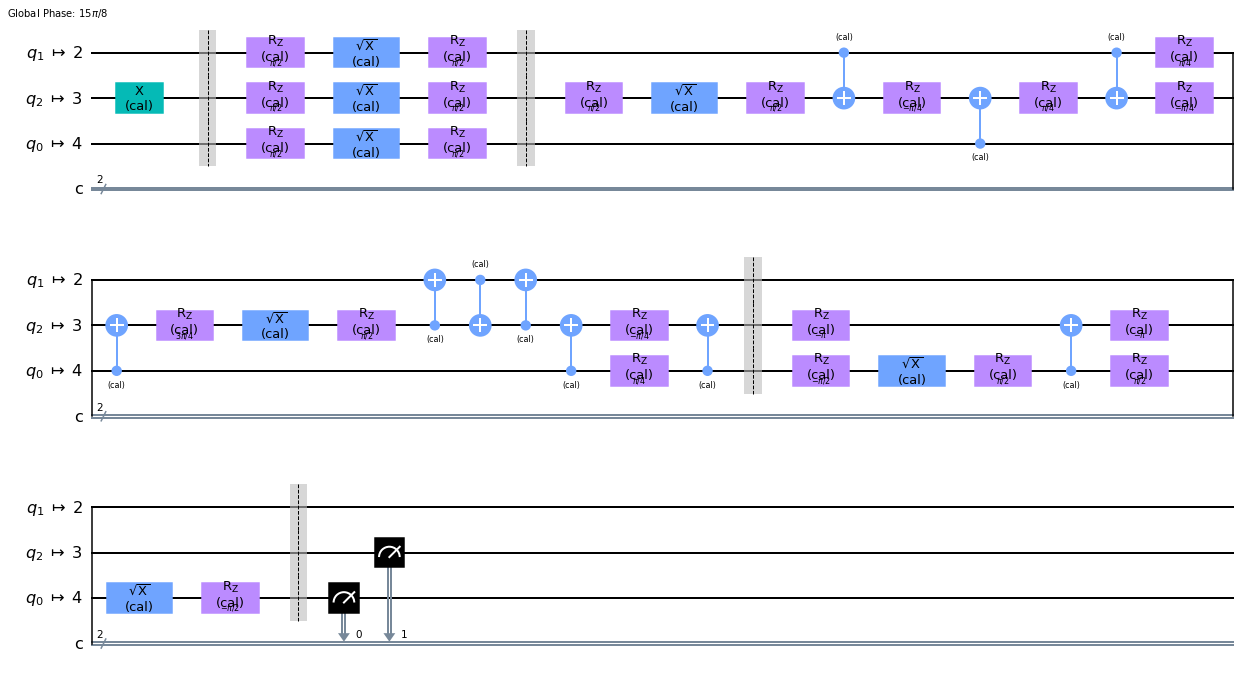

In [12]:
backend = FakeManila()

circ1 = transpile(circ, backend)

print(backend.configuration().basis_gates)
circ1.draw('mpl', idle_wires=False)

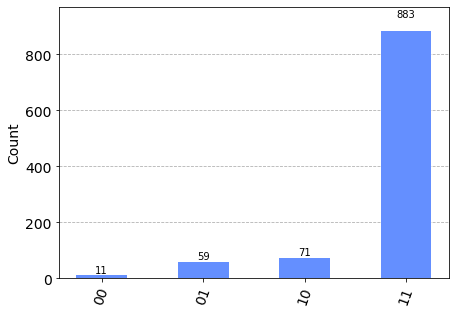

In [13]:
result = execute(circ1, backend=FakeManila()).result();
job = backend.run(circ1)
counts = job.result().get_counts()
plot_histogram(counts)

Análogamente haremos lo mismo, pero en diferentes backends. Por lo que los pasos son exactamente iguales.

Considerando las definiciones ya establecidas con las mismas características del pulso,
podemos entonces establecer el circuito
que hemos diseñado. Éste tendrá el backend=FakeOpenPulse3Q

In [14]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 


def Grover_Iteration(qc, x_qubit_0,x_qubit_1):
    qc.h(range(2))
    qc.x(range(2))
    qc.h(x_qubit_1)
    qc.cx(x_qubit_0,x_qubit_1)
    qc.h(x_qubit_1)
    qc.x(range(2))
    qc.h(range(2))
    
    return qc

print('se ha ejecutado correctamente')

se ha ejecutado correctamente


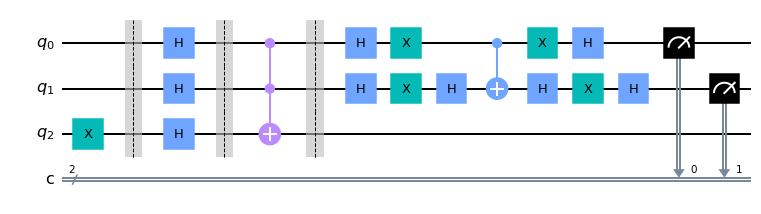

In [15]:
#Simulador de prueba FakeOpenPulse3Q
backend = FakeOpenPulse3Q() 
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


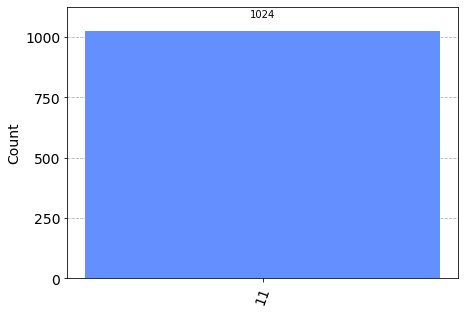

In [16]:
result = execute(circ, backend=FakeOpenPulse3Q()).result();
job = backend.run(circ)
counts = job.result().get_counts()
plot_histogram(counts)

In [17]:
backend = FakeOpenPulse3Q();

with pulse.build(backend, name='hadamard') as h_q1:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=3), pulse.drive_channel(0))

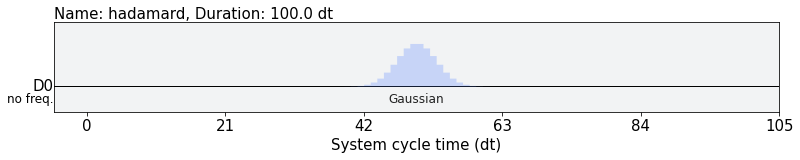

In [18]:
h_q1.draw()

In [19]:
backend = FakeOpenPulse3Q();

with pulse.build(backend, name='hadamard') as h_q1: #el 'h_q1 es invariable y puede ser nombrado de cualquier forma solo identifica'
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=33.33), pulse.drive_channel(0))

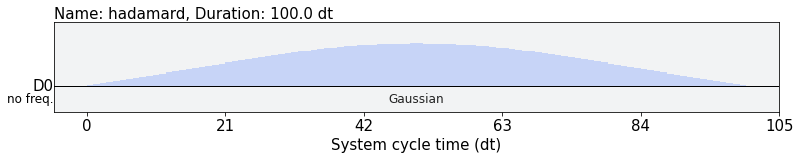

In [20]:
h_q1.draw()

In [21]:
circ.add_calibration( 'h', [0], h_q1)
circ.add_calibration( 'x', [0], h_q1)
circ.add_calibration( 'cx',[0], h_q1)
circ.add_calibration( 'sx',[0], h_q1)
circ.add_calibration( 'id',[0], h_q1)
circ.add_calibration( 'rz',[0], h_q1)
circ.add_calibration( 'reset',[0], h_q1)


['u1', 'u2', 'u3', 'cx', 'id']


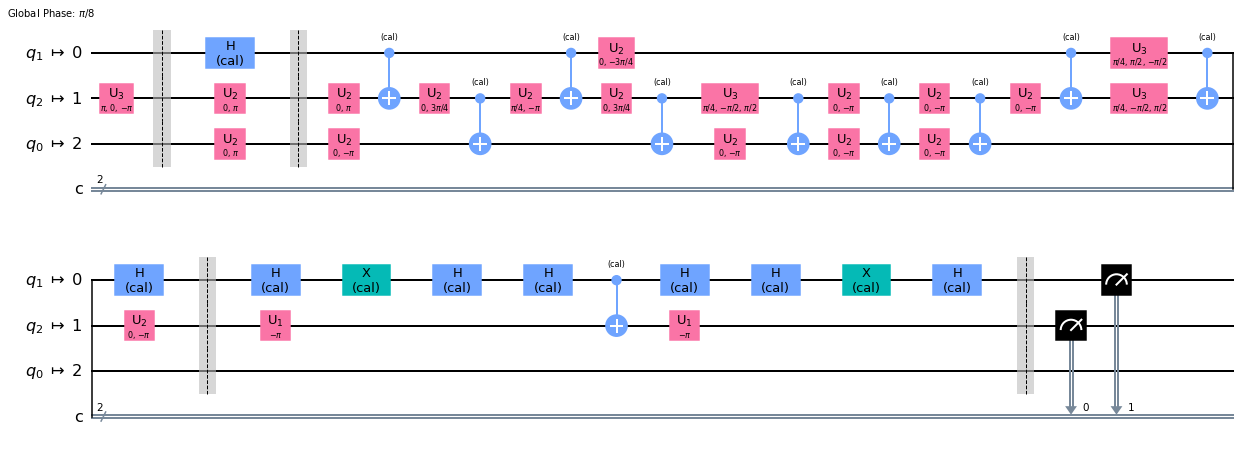

In [22]:
backend = FakeOpenPulse3Q()

circ2 = transpile(circ, backend)

print(backend.configuration().basis_gates)
circ2.draw('mpl', idle_wires=False)

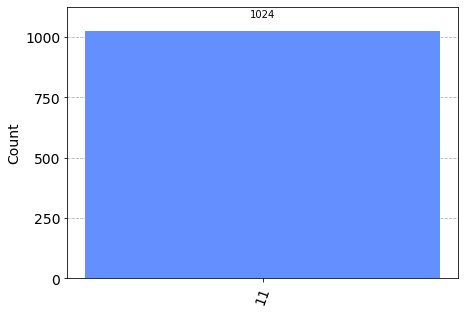

In [23]:
result = execute(circ2, backend=FakeManila()).result();
job = backend.run(circ2)
counts = job.result().get_counts()
plot_histogram(counts)

2) Características del pulso: 100ns amp=0.1 Sigma=10
(Recordemos que este puslo se ejecutará en los servidores ya establecidos arriba)

Considerando las definiciones ya establecidas, podemos entonces establecer el circuito
que hemos diseñado. Éste tendrá el backend=FakeManila.

In [24]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 


def Grover_Iteration(qc, x_qubit_0,x_qubit_1):
    qc.h(range(2))
    qc.x(range(2))
    qc.h(x_qubit_1)
    qc.cx(x_qubit_0,x_qubit_1)
    qc.h(x_qubit_1)
    qc.x(range(2))
    qc.h(range(2))
    
    return qc

print('se ha ejecutado correctamente')

se ha ejecutado correctamente


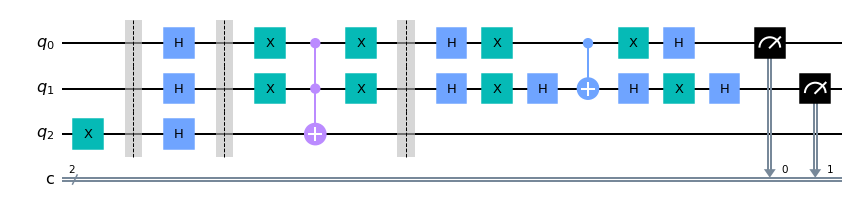

In [25]:
#Simulador de prueba FakeManila
backend = FakeManila() 
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


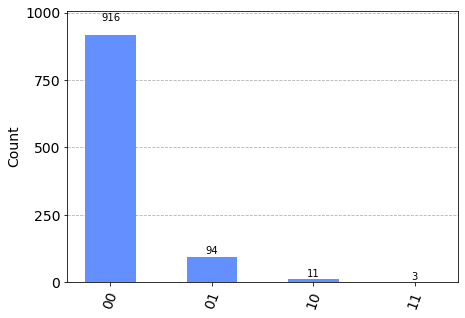

In [26]:
result = execute(circ, backend=FakeManila()).result();
job = backend.run(circ)
counts = job.result().get_counts()
plot_histogram(counts)

In [27]:
backend = FakeManila();

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=3), pulse.drive_channel(0))

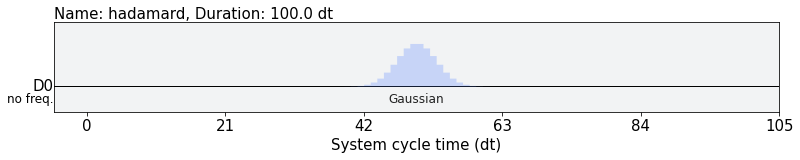

In [28]:
h_q0.draw()

In [29]:
backend = FakeManila();

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=10), pulse.drive_channel(0))

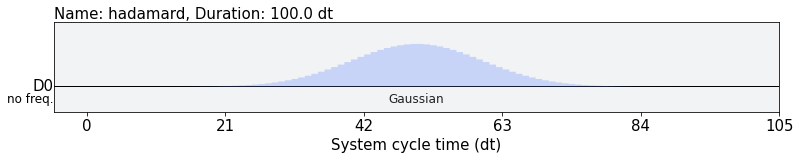

In [30]:
h_q0.draw()

In [35]:
circ.add_calibration( 'h', [0], h_q0)
circ.add_calibration( 'x', [0], h_q0)
circ.add_calibration( 'cx',[0], h_q0)
circ.add_calibration( 'sx',[0], h_q0)
circ.add_calibration( 'id',[0], h_q0)
circ.add_calibration( 'rz',[0], h_q0)
circ.add_calibration( 'reset',[0], h_q0)


['id', 'rz', 'sx', 'x', 'cx', 'reset']


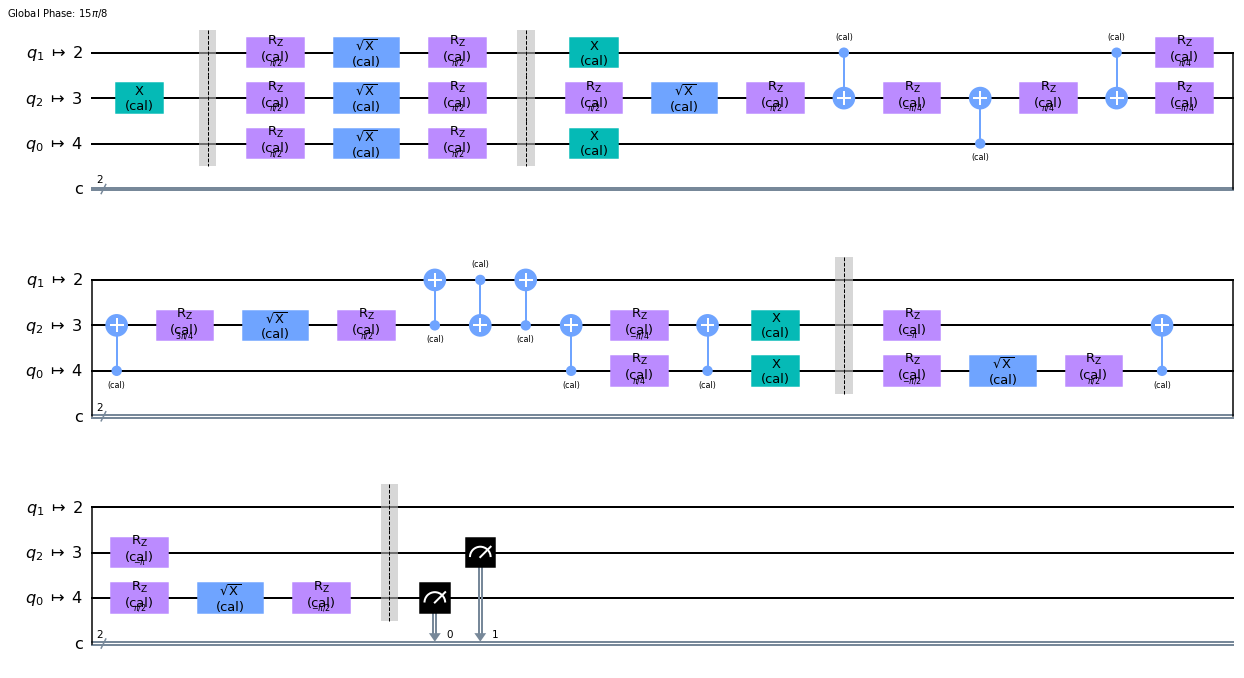

In [36]:
backend = FakeManila()

circ1 = transpile(circ, backend)

print(backend.configuration().basis_gates)
circ1.draw('mpl', idle_wires=False)

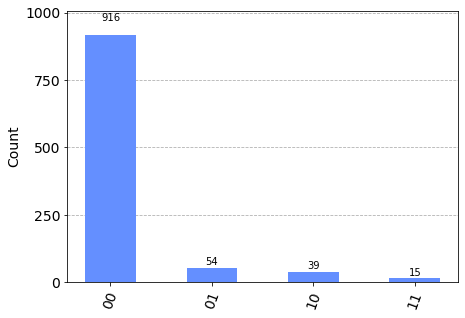

In [37]:
result = execute(circ1, backend=FakeManila()).result();
job = backend.run(circ1)
counts = job.result().get_counts()
plot_histogram(counts)

Considerando las definiciones ya establecidas con las mismas características del pulso,
podemos entonces establecer el circuito
que hemos diseñado. Éste tendrá el backend=FakeOpenPulse3Q

In [38]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 


def Grover_Iteration(qc, x_qubit_0,x_qubit_1):
    qc.h(range(2))
    qc.x(range(2))
    qc.h(x_qubit_1)
    qc.cx(x_qubit_0,x_qubit_1)
    qc.h(x_qubit_1)
    qc.x(range(2))
    qc.h(range(2))
    
    return qc

print('se ha ejecutado correctamente')

se ha ejecutado correctamente


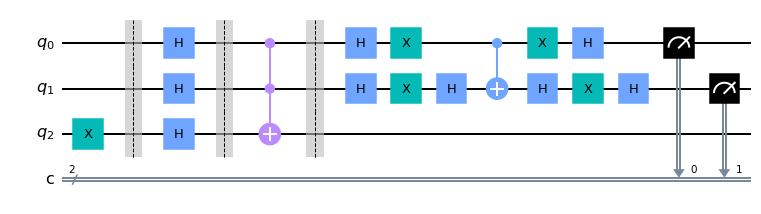

In [39]:
#Simulador de prueba FakeOpenPulse3Q
backend = FakeOpenPulse3Q() 
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


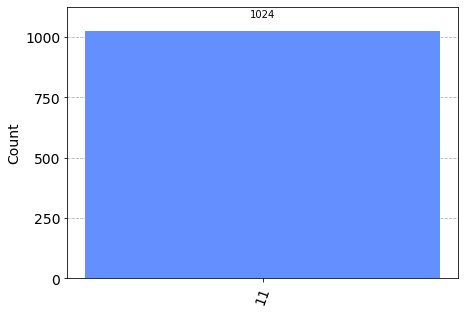

In [40]:
result = execute(circ, backend=FakeOpenPulse3Q()).result();
job = backend.run(circ)
counts = job.result().get_counts()
plot_histogram(counts)

In [41]:
backend = FakeOpenPulse3Q();

with pulse.build(backend, name='hadamard') as h_q1:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=3), pulse.drive_channel(0))

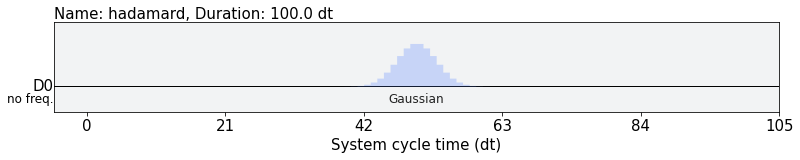

In [42]:
h_q1.draw()

In [43]:
backend = FakeOpenPulse3Q();

with pulse.build(backend, name='hadamard') as h_q1:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=10), pulse.drive_channel(0))

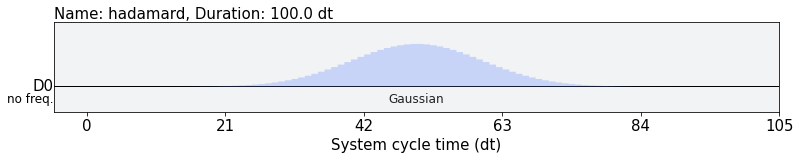

In [44]:
h_q1.draw()

In [45]:
circ.add_calibration( 'h', [0], h_q1)
circ.add_calibration( 'x', [0], h_q1)
circ.add_calibration( 'cx',[0], h_q1)
circ.add_calibration( 'sx',[0], h_q1)
circ.add_calibration( 'id',[0], h_q1)
circ.add_calibration( 'rz',[0], h_q1)
circ.add_calibration( 'reset',[0], h_q1)


['u1', 'u2', 'u3', 'cx', 'id']


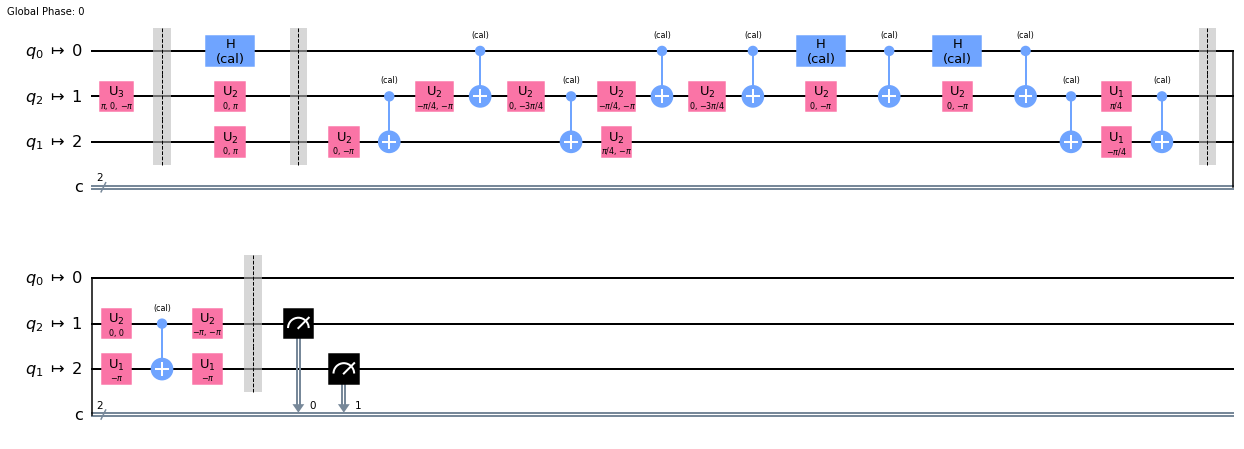

In [46]:
backend = FakeOpenPulse3Q()

circ2 = transpile(circ, backend)

print(backend.configuration().basis_gates)
circ2.draw('mpl', idle_wires=False)

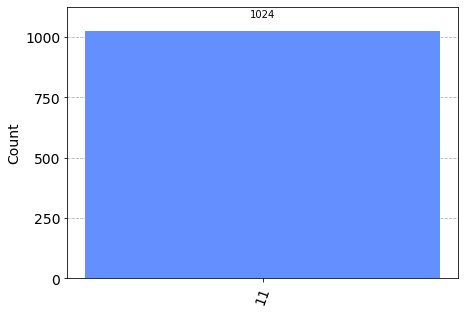

In [47]:
result = execute(circ2, backend=FakeOpenPulse3Q()).result();
job = backend.run(circ2)
counts = job.result().get_counts()
plot_histogram(counts)

3) Características del pulso: 100ns amp=0.1 Sigma=5
(Recordemos que este puslo se ejecutará en los servidores ya establecidos arriba)

Considerando las definiciones ya establecidas, podemos entonces establecer el circuito
que hemos diseñado. Éste tendrá el backend=FakeManila.

In [48]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 


def Grover_Iteration(qc, x_qubit_0,x_qubit_1):
    qc.h(range(2))
    qc.x(range(2))
    qc.h(x_qubit_1)
    qc.cx(x_qubit_0,x_qubit_1)
    qc.h(x_qubit_1)
    qc.x(range(2))
    qc.h(range(2))
    
    return qc

print('se ha ejecutado correctamente')

se ha ejecutado correctamente


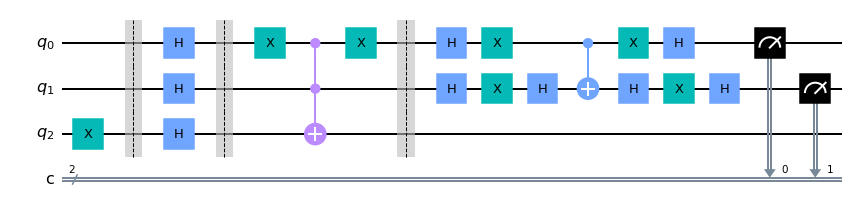

In [49]:
#Simulador de prueba FakeManila
backend = FakeManila() 
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


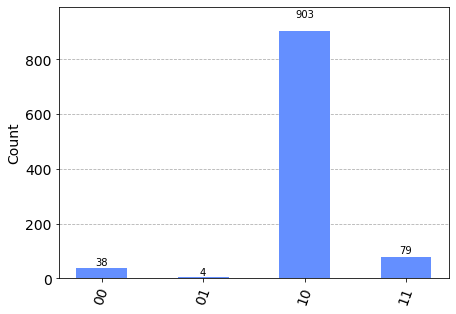

In [50]:
result = execute(circ, backend=FakeManila()).result();
job = backend.run(circ)
counts = job.result().get_counts()
plot_histogram(counts)

In [51]:
backend = FakeManila();

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=3), pulse.drive_channel(0))

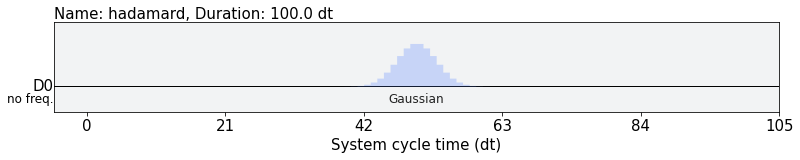

In [52]:
h_q0.draw()

In [53]:
backend = FakeManila();

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=5), pulse.drive_channel(0))

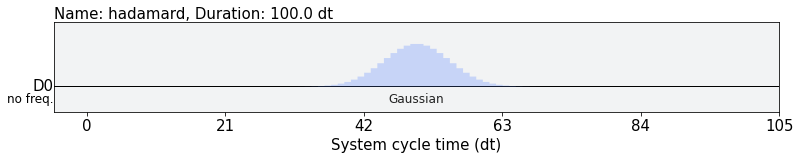

In [54]:
h_q0.draw()

In [55]:
circ.add_calibration( 'h', [0], h_q0)
circ.add_calibration( 'x', [0], h_q0)
circ.add_calibration( 'cx',[0], h_q0)
circ.add_calibration( 'sx',[0], h_q0)
circ.add_calibration( 'id',[0], h_q0)
circ.add_calibration( 'rz',[0], h_q0)
circ.add_calibration( 'reset',[0], h_q0)


['id', 'rz', 'sx', 'x', 'cx', 'reset']


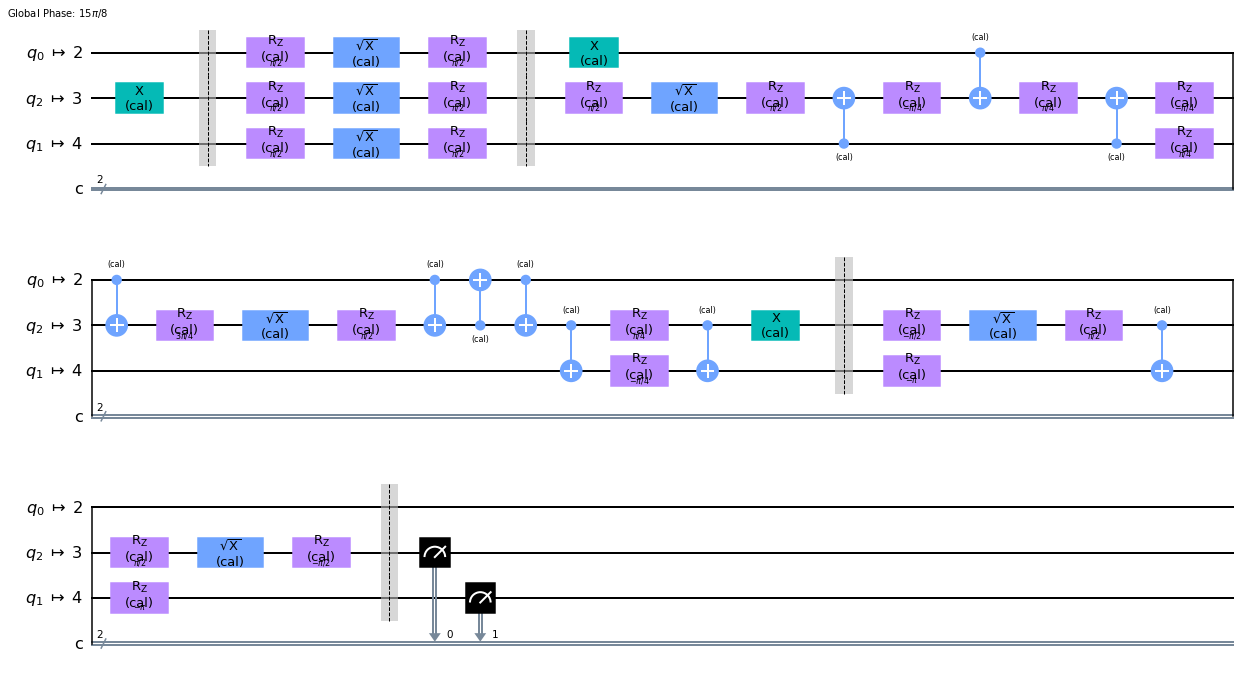

In [56]:
backend = FakeManila()

circ1 = transpile(circ, backend)

print(backend.configuration().basis_gates)
circ1.draw('mpl', idle_wires=False)

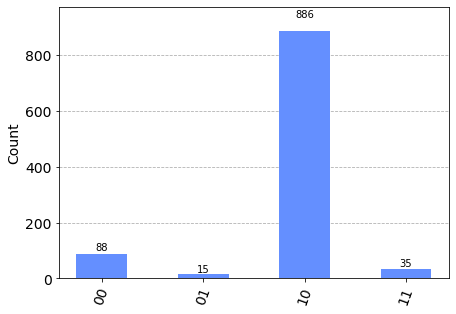

In [57]:
result = execute(circ1, backend=FakeManila()).result();
job = backend.run(circ1)
counts = job.result().get_counts()
plot_histogram(counts)

Considerando las definiciones ya establecidas con las mismas características del pulso,
podemos entonces establecer el circuito
que hemos diseñado. Éste tendrá el backend=FakeOpenPulse3Q

In [58]:
def SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    return qc

def SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    return qc

def SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_1)
    return qc

def SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit):
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    qc.ccx(x_qubit_0,x_qubit_1,y_qubit)
    qc.x(x_qubit_0)
    qc.x(x_qubit_1)
    return qc

def random_oracle(qc, x_qubit_0,x_qubit_1,y_qubit):
    rand=randint(0,3)
    if rand==3:
    	SoQ_Grover_0(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==2:
    	SoQ_Grover_1(qc, x_qubit_0,x_qubit_1,y_qubit)
    elif rand==1:
    	SoQ_Grover_2(qc, x_qubit_0,x_qubit_1,y_qubit)
    else:
    	SoQ_Grover_3(qc, x_qubit_0,x_qubit_1,y_qubit)         
    return qc 


def Grover_Iteration(qc, x_qubit_0,x_qubit_1):
    qc.h(range(2))
    qc.x(range(2))
    qc.h(x_qubit_1)
    qc.cx(x_qubit_0,x_qubit_1)
    qc.h(x_qubit_1)
    qc.x(range(2))
    qc.h(range(2))
    
    return qc

print('se ha ejecutado correctamente')

se ha ejecutado correctamente


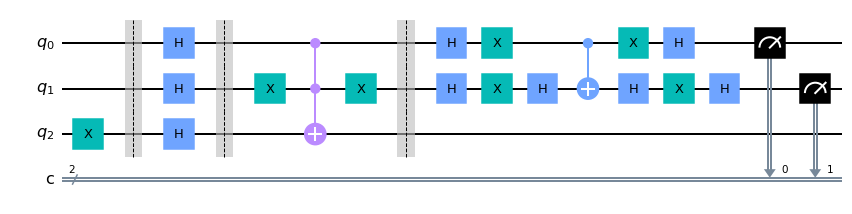

In [59]:
#Simulador de prueba FakeOpenPulse3Q
backend = FakeOpenPulse3Q() 
x_register=2
y_register=1
measure_register=2
y_position=x_register+y_register-1

circ = QuantumCircuit(x_register+y_register,measure_register)

circ.x(y_position)
circ.barrier()
circ.h(range(x_register+y_register))
circ.barrier()
random_oracle(circ, 0,1,2)
circ.barrier()
Grover_Iteration(circ, 0,1)
circ.measure(range(x_register),range(measure_register))

circ.draw('mpl')


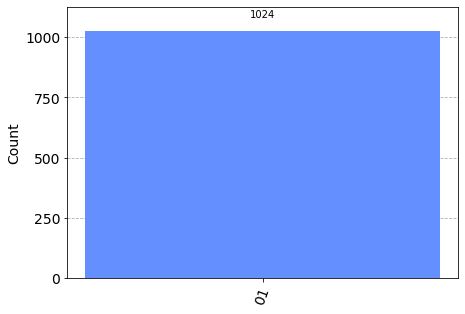

In [60]:
result = execute(circ, backend=FakeOpenPulse3Q()).result();
job = backend.run(circ)
counts = job.result().get_counts()
plot_histogram(counts)

In [61]:
backend = FakeOpenPulse3Q();

with pulse.build(backend, name='hadamard') as h_q1:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=3), pulse.drive_channel(0))

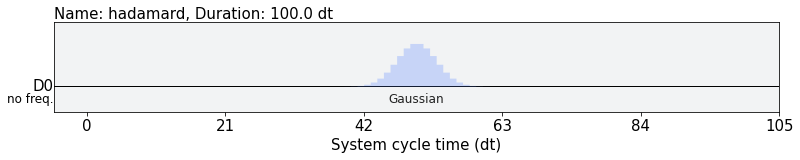

In [62]:
h_q1.draw()

In [63]:
backend = FakeOpenPulse3Q();

with pulse.build(backend, name='hadamard') as h_q1:
    pulse.play(Gaussian(duration=100, amp=0.1, sigma=5), pulse.drive_channel(0))

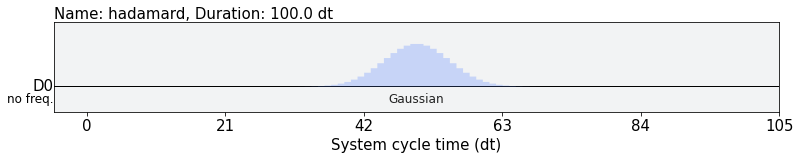

In [64]:
h_q1.draw()

In [65]:
circ.add_calibration( 'h', [0], h_q1)
circ.add_calibration( 'x', [0], h_q1)
circ.add_calibration( 'cx',[0], h_q1)
circ.add_calibration( 'sx',[0], h_q1)
circ.add_calibration( 'id',[0], h_q1)
circ.add_calibration( 'rz',[0], h_q1)
circ.add_calibration( 'reset',[0], h_q1)


['u1', 'u2', 'u3', 'cx', 'id']


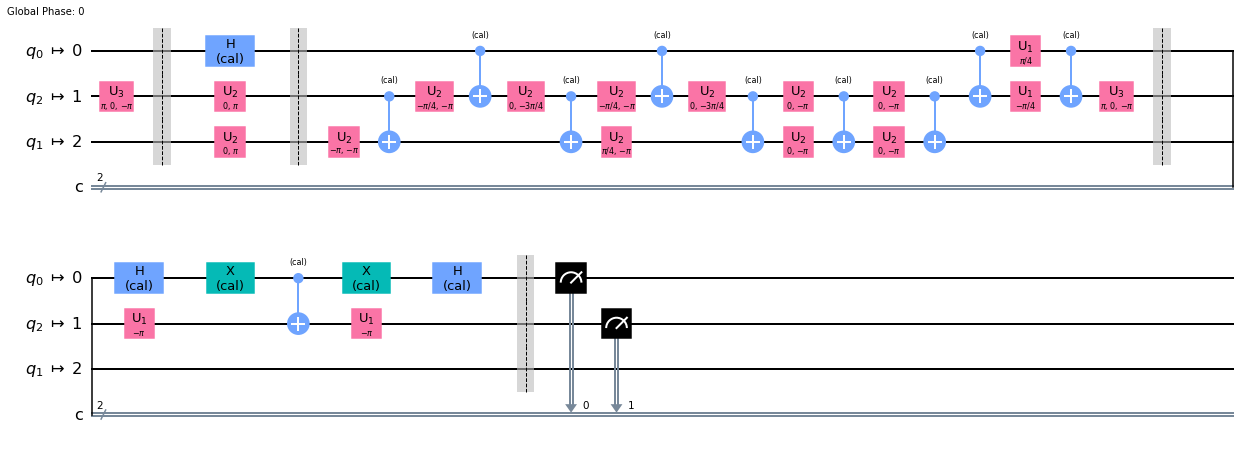

In [66]:
backend = FakeOpenPulse3Q()

circ2 = transpile(circ, backend)

print(backend.configuration().basis_gates)
circ2.draw('mpl', idle_wires=False)

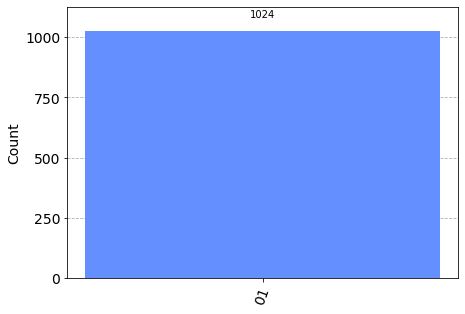

In [67]:
result = execute(circ2, backend=FakeOpenPulse3Q()).result();
job = backend.run(circ2)
counts = job.result().get_counts()
plot_histogram(counts)